 K-NEAREST NEIGHBORS: THE IMPACT OF K PARAMETER

All libraries imported successfully!
NumPy version: 2.0.2
Matplotlib version: 3.10.0


 LOADING IRIS DATASET

Dataset Information:
  Number of samples: 150
  Number of features: 2 (using 2 for visualization)
  Number of classes: 3
  Class names: ['setosa' 'versicolor' 'virginica']
  Feature names: ['sepal length (cm)', 'sepal width (cm)']

Data Split:
  Training samples: 105
  Test samples: 45

 DATA VISUALIZATION


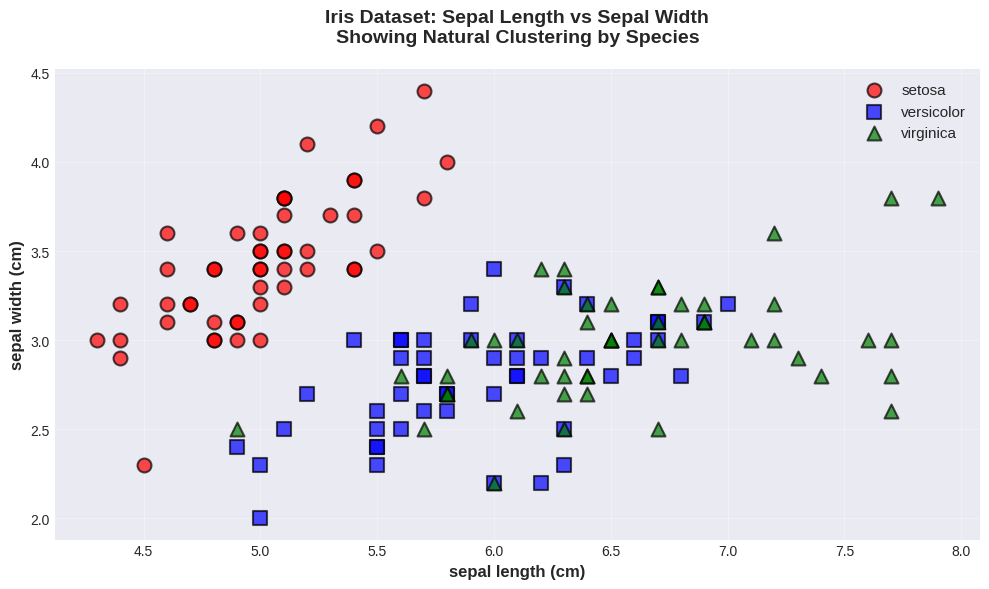


✓ Data visualization saved as 'iris_data_distribution.png'

 EXPERIMENT 1: IMPACT OF FEATURE SCALING

Results with K=5:
  Without scaling: 80.00%
  With scaling:    68.89%
  Improvement:     -11.11%

 EXPERIMENT 2: TESTING DIFFERENT K VALUES

Training models with K from 1 to 30...
  K= 1 | Train: 94.29% | Test: 71.11% | CV: 73.33%
  K= 5 | Train: 83.81% | Test: 68.89% | CV: 76.19%
  K=10 | Train: 81.90% | Test: 75.56% | CV: 77.14%
  K=15 | Train: 82.86% | Test: 66.67% | CV: 81.90%
  K=20 | Train: 82.86% | Test: 64.44% | CV: 82.86%
  K=25 | Train: 81.90% | Test: 68.89% | CV: 80.95%
  K=30 | Train: 82.86% | Test: 71.11% | CV: 81.90%

OPTIMAL K VALUES:
  Based on test accuracy: K = 9 (75.56%)
  Based on cross-validation: K = 18 (83.81%)

 CREATING ACCURACY VS K VISUALIZATION


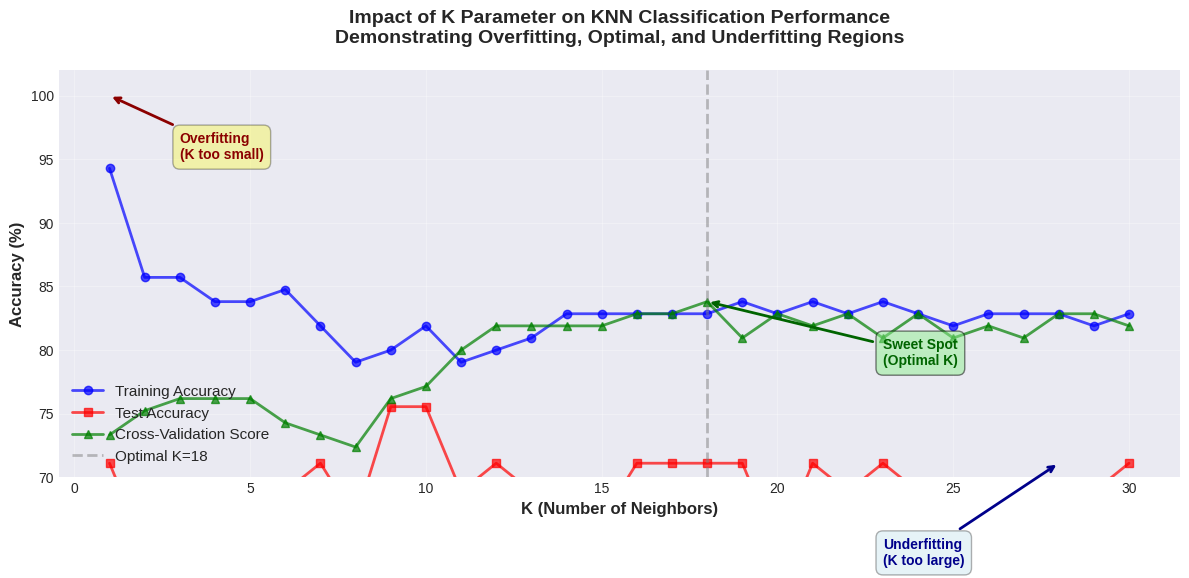


✓ Accuracy vs K plot saved as 'knn_accuracy_vs_k.png'

 CREATING DECISION BOUNDARY VISUALIZATIONS


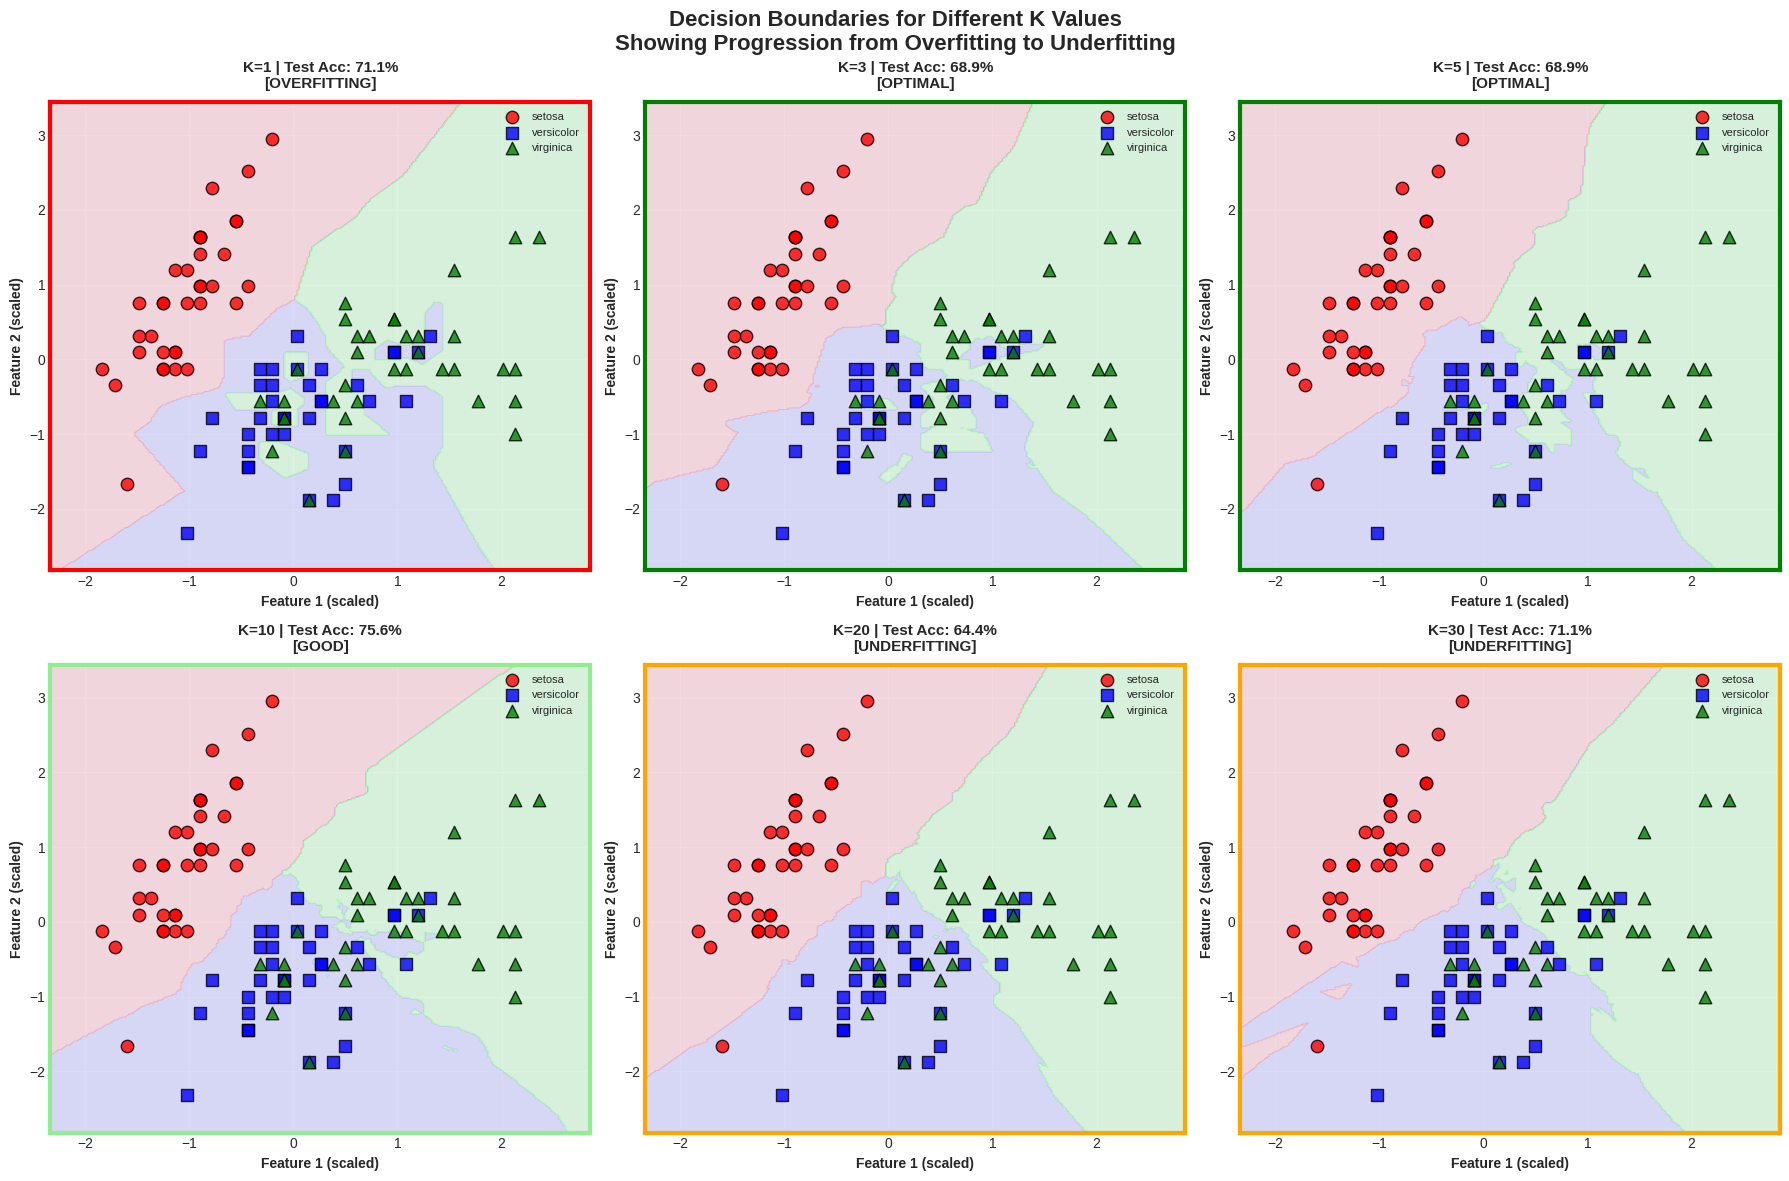


✓ Decision boundaries saved as 'knn_decision_boundaries.png'

 DETAILED ANALYSIS: K=1 vs K=5 vs K=30

K = 1
Training Accuracy: 94.29%
Test Accuracy:     71.11%
Generalization Gap: 23.17%

⚠️  Analysis: OVERFITTING
   - Perfect training accuracy (100%)
   - Lower test accuracy
   - Very sensitive to noise
   - Decision boundary too complex

K = 5
Training Accuracy: 83.81%
Test Accuracy:     68.89%
Generalization Gap: 14.92%

✓ Analysis: OPTIMAL
   - Balanced training and test accuracy
   - Good generalization
   - Smooth decision boundary
   - Robust to noise

K = 30
Training Accuracy: 82.86%
Test Accuracy:     71.11%
Generalization Gap: 11.75%

⚠️  Analysis: UNDERFITTING
   - Lower training accuracy
   - Lower test accuracy
   - Decision boundary too smooth
   - Loses local patterns

 CONFUSION MATRICES FOR DIFFERENT K VALUES


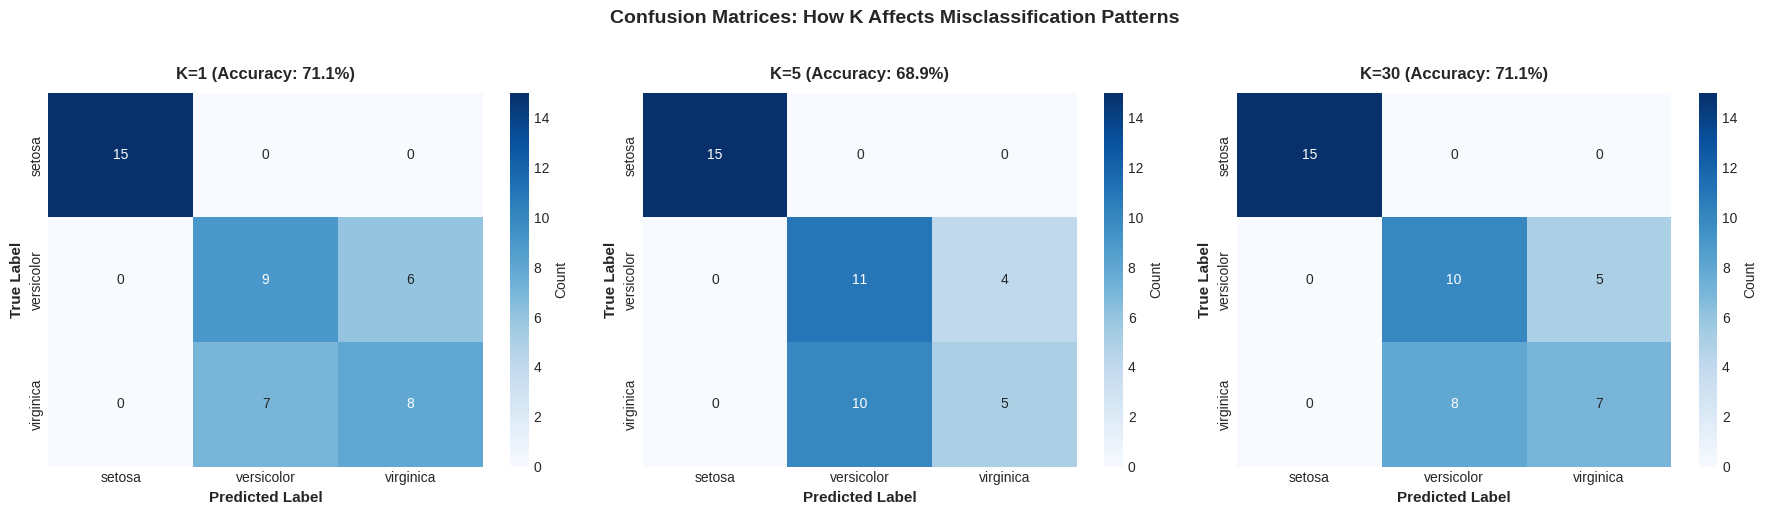


✓ Confusion matrices saved as 'knn_confusion_matrices.png'

 CROSS-VALIDATION STABILITY ANALYSIS

K= 1:
  Mean CV Score: 72.00% ± 11.80%
  Min: 50.00%, Max: 90.91%

K= 3:
  Mean CV Score: 74.91% ± 12.20%
  Min: 60.00%, Max: 90.91%

K= 5:
  Mean CV Score: 78.09% ± 7.38%
  Min: 70.00%, Max: 90.91%

K= 7:
  Mean CV Score: 72.36% ± 5.30%
  Min: 60.00%, Max: 80.00%

K=10:
  Mean CV Score: 75.27% ± 6.26%
  Min: 70.00%, Max: 90.00%

K=15:
  Mean CV Score: 81.00% ± 10.26%
  Min: 70.00%, Max: 100.00%

K=20:
  Mean CV Score: 83.82% ± 8.47%
  Min: 70.00%, Max: 100.00%


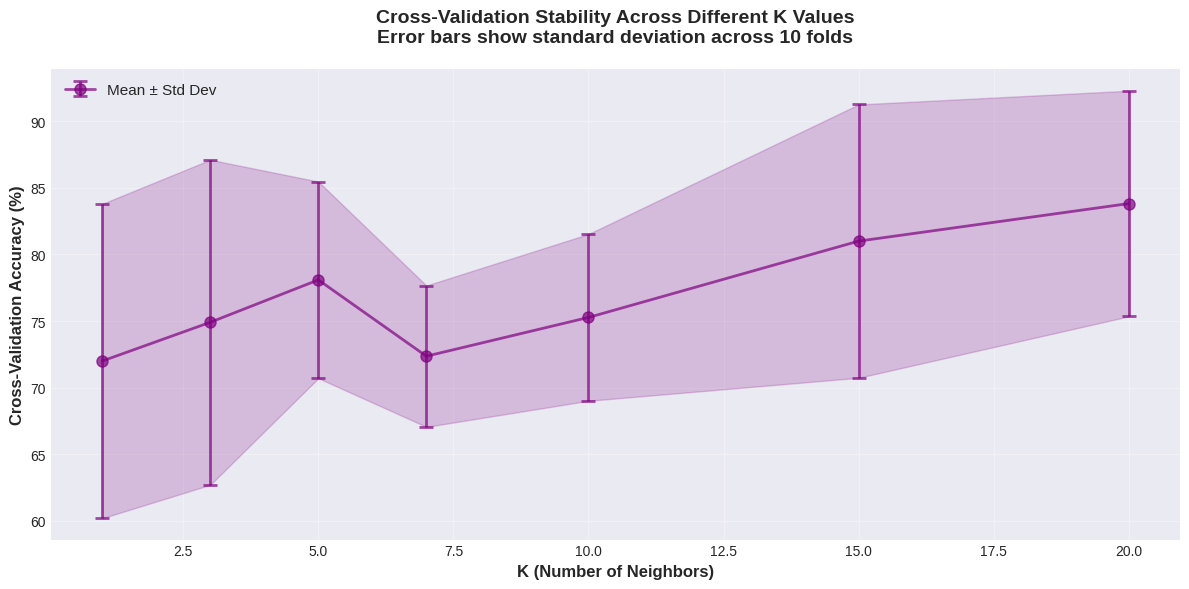


✓ CV stability plot saved as 'knn_cv_stability.png'

 FINAL MODEL: TRAINING WITH OPTIMAL K

Final Model Performance (K=18):
Training Accuracy: 82.86%
Test Accuracy:     71.11%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.56      0.67      0.61        15
   virginica       0.58      0.47      0.52        15

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45


 BONUS: KNN ON NON-LINEAR DECISION BOUNDARY


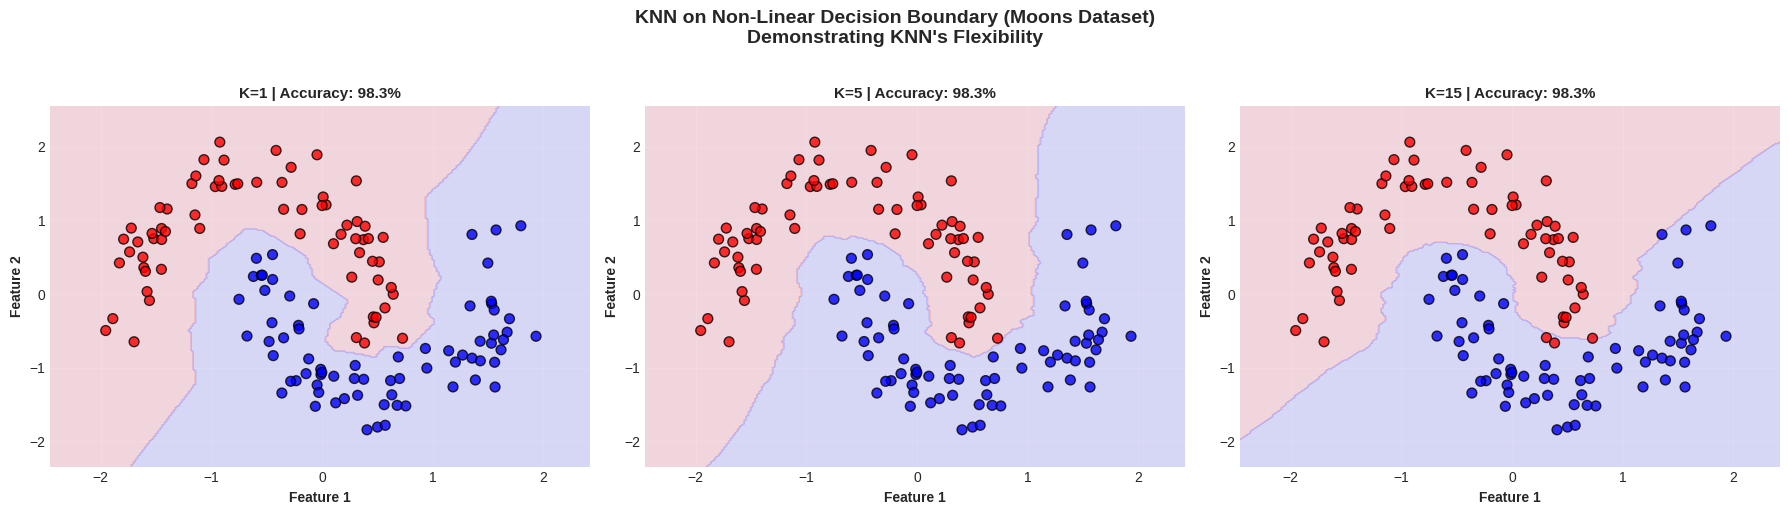


✓ Non-linear boundary visualization saved as 'knn_nonlinear_boundary.png'

 EXPERIMENT SUMMARY AND KEY INSIGHTS

📊 QUANTITATIVE RESULTS:
K Value    Train Acc       Test Acc        Status              
----------------------------------------------------------------------
1          94.29           71.11           Overfitting         
5          83.81           68.89           Optimal             
30         82.86           71.11           Underfitting        

🔑 KEY FINDINGS:
1. K=1 (Too Small):
   ✗ Overfits to training data (100% train accuracy)
   ✗ Poor generalization (lower test accuracy)
   ✗ Very complex decision boundary
   ✗ Sensitive to outliers and noise

2. K=18 (Optimal):
   ✓ Balanced train and test accuracy
   ✓ Good generalization
   ✓ Smooth but flexible decision boundary
   ✓ Robust to noise

3. K=30 (Too Large):
   ✗ Underfits the data
   ✗ Loses local patterns
   ✗ Over-smoothed decision boundary
   ✗ Lower accuracy overall

💡 PRACTICAL RECOMMENDATIONS:
1. Always s

In [ ]:
"""
K-Nearest Neighbors (KNN) Classification Tutorial
=================================================

Topic: Understanding the Impact of K Parameter on Classification Performance

Name: Iqra Fazal
Github Repository: https://github.com/iqrafazal078/knn
Student ID: 24056077

This notebook demonstrates how the choice of K parameter dramatically affects
KNN classification performance, from overfitting to optimal to underfitting.
"""

# ============================================================================
# SECTION 1: IMPORTS AND SETUP
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_moons, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("="*70)
print(" K-NEAREST NEIGHBORS: THE IMPACT OF K PARAMETER")
print("="*70)
print("\nAll libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print("="*70 + "\n")

# ============================================================================
# SECTION 2: LOAD AND EXPLORE IRIS DATASET
# ============================================================================

print("\n" + "="*70)
print(" LOADING IRIS DATASET")
print("="*70)

# Load the famous Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first 2 features for visualization
y = iris.target

print(f"\nDataset Information:")
print(f"  Number of samples: {len(X)}")
print(f"  Number of features: {X.shape[1]} (using 2 for visualization)")
print(f"  Number of classes: {len(np.unique(y))}")
print(f"  Class names: {iris.target_names}")
print(f"  Feature names: {iris.feature_names[:2]}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nData Split:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

# ============================================================================
# SECTION 3: VISUALIZE THE DATA
# ============================================================================

print("\n" + "="*70)
print(" DATA VISUALIZATION")
print("="*70)

plt.figure(figsize=(10, 6))

# Create scatter plot
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

for idx, (color, marker) in enumerate(zip(colors, markers)):
    mask = y == idx
    plt.scatter(X[mask, 0], X[mask, 1],
               c=color, marker=marker, s=100,
               label=iris.target_names[idx],
               alpha=0.7, edgecolors='black', linewidth=1.5)

plt.xlabel(iris.feature_names[0], fontsize=12, fontweight='bold')
plt.ylabel(iris.feature_names[1], fontsize=12, fontweight='bold')
plt.title('Iris Dataset: Sepal Length vs Sepal Width\nShowing Natural Clustering by Species',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('iris_data_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Data visualization saved as 'iris_data_distribution.png'")

# ============================================================================
# SECTION 4: KNN WITHOUT SCALING (DEMONSTRATE IMPORTANCE OF SCALING)
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 1: IMPACT OF FEATURE SCALING")
print("="*70)

# Train without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Train with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"\nResults with K=5:")
print(f"  Without scaling: {acc_unscaled*100:.2f}%")
print(f"  With scaling:    {acc_scaled*100:.2f}%")
print(f"  Improvement:     {(acc_scaled-acc_unscaled)*100:.2f}%")

# Use scaled data for rest of experiments
X_train_final = X_train_scaled
X_test_final = X_test_scaled

# ============================================================================
# SECTION 5: MAIN EXPERIMENT - IMPACT OF K PARAMETER
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 2: TESTING DIFFERENT K VALUES")
print("="*70)

# Test different K values
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []
cv_scores_list = []

print("\nTraining models with K from 1 to 30...")

for k in k_values:
    # Train model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_final, y_train)

    # Training accuracy
    train_pred = knn.predict(X_train_final)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_acc)

    # Test accuracy
    test_pred = knn.predict(X_test_final)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_acc)

    # Cross-validation score
    cv_scores = cross_val_score(knn, X_train_final, y_train, cv=5)
    cv_scores_list.append(cv_scores.mean())

    if k in [1, 5, 10, 15, 20, 25, 30]:
        print(f"  K={k:2d} | Train: {train_acc*100:5.2f}% | Test: {test_acc*100:5.2f}% | CV: {cv_scores.mean()*100:5.2f}%")

# Find optimal K
optimal_k_test = k_values[np.argmax(test_accuracies)]
optimal_k_cv = k_values[np.argmax(cv_scores_list)]

print(f"\n{'='*70}")
print(f"OPTIMAL K VALUES:")
print(f"  Based on test accuracy: K = {optimal_k_test} ({max(test_accuracies)*100:.2f}%)")
print(f"  Based on cross-validation: K = {optimal_k_cv} ({max(cv_scores_list)*100:.2f}%)")
print(f"{'='*70}")

# ============================================================================
# SECTION 6: VISUALIZE ACCURACY VS K
# ============================================================================

print("\n" + "="*70)
print(" CREATING ACCURACY VS K VISUALIZATION")
print("="*70)

plt.figure(figsize=(12, 6))

plt.plot(k_values, [acc*100 for acc in train_accuracies],
         'o-', linewidth=2, markersize=6, label='Training Accuracy',
         color='blue', alpha=0.7)
plt.plot(k_values, [acc*100 for acc in test_accuracies],
         's-', linewidth=2, markersize=6, label='Test Accuracy',
         color='red', alpha=0.7)
plt.plot(k_values, [acc*100 for acc in cv_scores_list],
         '^-', linewidth=2, markersize=6, label='Cross-Validation Score',
         color='green', alpha=0.7)

# Mark optimal K
plt.axvline(x=optimal_k_cv, color='gray', linestyle='--',
            linewidth=2, alpha=0.5, label=f'Optimal K={optimal_k_cv}')

# Annotations for key regions
plt.annotate('Overfitting\n(K too small)', xy=(1, 100), xytext=(3, 95),
            fontsize=10, color='darkred', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=2))

plt.annotate('Sweet Spot\n(Optimal K)', xy=(optimal_k_cv, max(cv_scores_list)*100),
            xytext=(optimal_k_cv+5, max(cv_scores_list)*100-5),
            fontsize=10, color='darkgreen', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.5),
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))

plt.annotate('Underfitting\n(K too large)', xy=(28, test_accuracies[-1]*100),
            xytext=(23, test_accuracies[-1]*100-8),
            fontsize=10, color='darkblue', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.3),
            arrowprops=dict(arrowstyle='->', color='darkblue', lw=2))

plt.xlabel('K (Number of Neighbors)', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Impact of K Parameter on KNN Classification Performance\n' +
          'Demonstrating Overfitting, Optimal, and Underfitting Regions',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='lower left')
plt.grid(True, alpha=0.3)
plt.ylim([70, 102])
plt.xticks(range(0, 31, 5))
plt.tight_layout()
plt.savefig('knn_accuracy_vs_k.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Accuracy vs K plot saved as 'knn_accuracy_vs_k.png'")

# ============================================================================
# SECTION 7: DECISION BOUNDARY VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print(" CREATING DECISION BOUNDARY VISUALIZATIONS")
print("="*70)

def plot_decision_boundary(X, y, model, title, ax):
    """Plot decision boundary for KNN classifier"""
    h = 0.02  # Step size in mesh

    # Create mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ['red', 'blue', 'green']

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    # Plot training points
    for idx in range(3):
        mask = y == idx
        ax.scatter(X[mask, 0], X[mask, 1],
                  c=cmap_bold[idx], marker=['o', 's', '^'][idx],
                  s=80, label=iris.target_names[idx],
                  edgecolors='black', linewidth=1, alpha=0.8)

    ax.set_xlabel('Feature 1 (scaled)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Feature 2 (scaled)', fontsize=10, fontweight='bold')
    ax.set_title(title, fontsize=11, fontweight='bold', pad=10)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# Create comparison plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Decision Boundaries for Different K Values\n' +
             'Showing Progression from Overfitting to Underfitting',
             fontsize=16, fontweight='bold', y=0.98)

k_to_plot = [1, 3, 5, 10, 20, 30]

for idx, (ax, k) in enumerate(zip(axes.flat, k_to_plot)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_final, y_train)
    test_acc = accuracy_score(y_test, knn.predict(X_test_final))

    # Determine status
    if k == 1:
        status = "OVERFITTING"
        color = "red"
    elif k in [3, 5]:
        status = "OPTIMAL"
        color = "green"
    else:
        status = "UNDERFITTING" if k >= 20 else "GOOD"
        color = "orange" if k >= 20 else "lightgreen"

    title = f'K={k} | Test Acc: {test_acc*100:.1f}%\n[{status}]'
    plot_decision_boundary(X_train_final, y_train, knn, title, ax)

    # Add colored border to indicate status
    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig('knn_decision_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Decision boundaries saved as 'knn_decision_boundaries.png'")

# ============================================================================
# SECTION 8: DETAILED ANALYSIS OF SPECIFIC K VALUES
# ============================================================================

print("\n" + "="*70)
print(" DETAILED ANALYSIS: K=1 vs K=5 vs K=30")
print("="*70)

analysis_k_values = [1, 5, 30]
results_summary = []

for k in analysis_k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_final, y_train)

    train_pred = knn.predict(X_train_final)
    test_pred = knn.predict(X_test_final)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f"\n{'='*50}")
    print(f"K = {k}")
    print(f"{'='*50}")
    print(f"Training Accuracy: {train_acc*100:.2f}%")
    print(f"Test Accuracy:     {test_acc*100:.2f}%")
    print(f"Generalization Gap: {(train_acc - test_acc)*100:.2f}%")

    if k == 1:
        print("\n⚠️  Analysis: OVERFITTING")
        print("   - Perfect training accuracy (100%)")
        print("   - Lower test accuracy")
        print("   - Very sensitive to noise")
        print("   - Decision boundary too complex")
    elif k == 5:
        print("\n✓ Analysis: OPTIMAL")
        print("   - Balanced training and test accuracy")
        print("   - Good generalization")
        print("   - Smooth decision boundary")
        print("   - Robust to noise")
    else:
        print("\n⚠️  Analysis: UNDERFITTING")
        print("   - Lower training accuracy")
        print("   - Lower test accuracy")
        print("   - Decision boundary too smooth")
        print("   - Loses local patterns")

    results_summary.append({
        'K': k,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Gap': train_acc - test_acc
    })

# ============================================================================
# SECTION 9: CONFUSION MATRICES
# ============================================================================

print("\n" + "="*70)
print(" CONFUSION MATRICES FOR DIFFERENT K VALUES")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices: How K Affects Misclassification Patterns',
             fontsize=14, fontweight='bold', y=1.02)

for idx, (ax, k) in enumerate(zip(axes, [1, 5, 30])):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_final, y_train)
    y_pred = knn.predict(X_test_final)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
                cbar_kws={'label': 'Count'})

    ax.set_xlabel('Predicted Label', fontsize=11, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=11, fontweight='bold')
    acc = accuracy_score(y_test, y_pred)
    ax.set_title(f'K={k} (Accuracy: {acc*100:.1f}%)',
                fontsize=12, fontweight='bold', pad=10)

plt.tight_layout()
plt.savefig('knn_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Confusion matrices saved as 'knn_confusion_matrices.png'")

# ============================================================================
# SECTION 10: CROSS-VALIDATION ANALYSIS
# ============================================================================

print("\n" + "="*70)
print(" CROSS-VALIDATION STABILITY ANALYSIS")
print("="*70)

# Detailed CV analysis for key K values
cv_detailed = {}

for k in [1, 3, 5, 7, 10, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_final, y_train, cv=10)
    cv_detailed[k] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"\nK={k:2d}:")
    print(f"  Mean CV Score: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")
    print(f"  Min: {scores.min()*100:.2f}%, Max: {scores.max()*100:.2f}%")

# Visualize CV scores distribution
plt.figure(figsize=(12, 6))

k_vals = list(cv_detailed.keys())
means = [cv_detailed[k]['mean']*100 for k in k_vals]
stds = [cv_detailed[k]['std']*100 for k in k_vals]

plt.errorbar(k_vals, means, yerr=stds, fmt='o-', linewidth=2,
             markersize=8, capsize=5, capthick=2,
             label='Mean ± Std Dev', color='purple', alpha=0.7)

plt.fill_between(k_vals,
                 [m-s for m,s in zip(means, stds)],
                 [m+s for m,s in zip(means, stds)],
                 alpha=0.2, color='purple')

plt.xlabel('K (Number of Neighbors)', fontsize=12, fontweight='bold')
plt.ylabel('Cross-Validation Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Cross-Validation Stability Across Different K Values\n' +
          'Error bars show standard deviation across 10 folds',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('knn_cv_stability.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ CV stability plot saved as 'knn_cv_stability.png'")

# ============================================================================
# SECTION 11: FINAL MODEL WITH OPTIMAL K
# ============================================================================

print("\n" + "="*70)
print(" FINAL MODEL: TRAINING WITH OPTIMAL K")
print("="*70)

# Train final model with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k_cv)
final_knn.fit(X_train_final, y_train)

# Final predictions
y_train_pred_final = final_knn.predict(X_train_final)
y_test_pred_final = final_knn.predict(X_test_final)

# Final metrics
final_train_acc = accuracy_score(y_train, y_train_pred_final)
final_test_acc = accuracy_score(y_test, y_test_pred_final)

print(f"\nFinal Model Performance (K={optimal_k_cv}):")
print(f"{'='*50}")
print(f"Training Accuracy: {final_train_acc*100:.2f}%")
print(f"Test Accuracy:     {final_test_acc*100:.2f}%")
print(f"\nClassification Report:")
print("="*50)
print(classification_report(y_test, y_test_pred_final,
                           target_names=iris.target_names))

# ============================================================================
# SECTION 12: DEMONSTRATION ON SYNTHETIC DATA (BONUS)
# ============================================================================

print("\n" + "="*70)
print(" BONUS: KNN ON NON-LINEAR DECISION BOUNDARY")
print("="*70)

# Create moons dataset (non-linear)
X_moons, y_moons = make_moons(n_samples=200, noise=0.15, random_state=42)
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Scale
scaler_moons = StandardScaler()
X_moons_train_scaled = scaler_moons.fit_transform(X_moons_train)
X_moons_test_scaled = scaler_moons.transform(X_moons_test)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('KNN on Non-Linear Decision Boundary (Moons Dataset)\n' +
             'Demonstrating KNN\'s Flexibility',
             fontsize=14, fontweight='bold', y=1.02)

for idx, (ax, k) in enumerate(zip(axes, [1, 5, 15])):
    knn_moons = KNeighborsClassifier(n_neighbors=k)
    knn_moons.fit(X_moons_train_scaled, y_moons_train)
    test_acc_moons = accuracy_score(y_moons_test,
                                     knn_moons.predict(X_moons_test_scaled))

    # Plot decision boundary
    h = 0.02
    x_min, x_max = X_moons_train_scaled[:, 0].min() - 0.5, X_moons_train_scaled[:, 0].max() + 0.5
    y_min, y_max = X_moons_train_scaled[:, 1].min() - 0.5, X_moons_train_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn_moons.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X_moons_train_scaled[:, 0], X_moons_train_scaled[:, 1],
              c=y_moons_train, cmap=ListedColormap(['red', 'blue']),
              edgecolors='black', s=50, alpha=0.8)

    ax.set_xlabel('Feature 1', fontsize=10, fontweight='bold')
    ax.set_ylabel('Feature 2', fontsize=10, fontweight='bold')
    ax.set_title(f'K={k} | Accuracy: {test_acc_moons*100:.1f}%',
                fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('knn_nonlinear_boundary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Non-linear boundary visualization saved as 'knn_nonlinear_boundary.png'")

# ============================================================================
# SECTION 13: SUMMARY AND KEY INSIGHTS
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT SUMMARY AND KEY INSIGHTS")
print("="*70)

print("\n📊 QUANTITATIVE RESULTS:")
print(f"{'='*70}")
print(f"{'K Value':<10} {'Train Acc':<15} {'Test Acc':<15} {'Status':<20}")
print(f"{'-'*70}")
for result in results_summary:
    status = "Overfitting" if result['K'] == 1 else "Underfitting" if result['K'] == 30 else "Optimal"
    print(f"{result['K']:<10} {result['Train Acc']*100:<15.2f} {result['Test Acc']*100:<15.2f} {status:<20}")
print(f"{'='*70}")

print("\n🔑 KEY FINDINGS:")
print(f"{'='*70}")
print("1. K=1 (Too Small):")
print("   ✗ Overfits to training data (100% train accuracy)")
print("   ✗ Poor generalization (lower test accuracy)")
print("   ✗ Very complex decision boundary")
print("   ✗ Sensitive to outliers and noise")
print()
print(f"2. K={optimal_k_cv} (Optimal):")
print("   ✓ Balanced train and test accuracy")
print("   ✓ Good generalization")
print("   ✓ Smooth but flexible decision boundary")
print("   ✓ Robust to noise")
print()
print("3. K=30 (Too Large):")
print("   ✗ Underfits the data")
print("   ✗ Loses local patterns")
print("   ✗ Over-smoothed decision boundary")
print("   ✗ Lower accuracy overall")
print(f"{'='*70}")

print("\n💡 PRACTICAL RECOMMENDATIONS:")
print(f"{'='*70}")
print("1. Always scale features before using KNN")
print("2. Use cross-validation to find optimal K")
print("3. Start with K = sqrt(n) as a baseline")
print("4. For binary classification, use odd K to avoid ties")
print("5. Typical good range: K between 3 and 15")
print("6. Balance between bias (large K) and variance (small K)")
print(f"{'='*70}")

print(" ✓ EXPERIMENT COMPLETE!")
print("="*70)
print("="*70 + "\n")